# Broadband Outage Detection


### Nadeem [3562] Batch : 78 INSOFE Bangalore


## Problem Description:

### India is seeing an explosion of new competitors in the Broadband space. 'India Broadband' is a company that is now seeing a lot of customer churn due to customer dissatisfaction because of broadband outages.The company has now curated a dataset, where it tracks several variables that it believes impact the `outage_duration`. They have tracked three different outage durations, `0` for no outage, `1` for short outages that last anywhere between a few minutes and a maximum of 2 hours, and `2` for long outages that can last from 2 hours to sometimes even a couple of days.You will now have to use these metrics that the company has tracked to create a machine learning model that will be able to predict the `outage_duration` so that the company can better handle outages and improve customer satisfaction and therefore reduce customer churn.

## Exploratory Data Analysis

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


#### Importing the required libararies

In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import neighbors
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats.mstats import mode
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
import math
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,  cross_val_score, StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 4

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### There are 7 CSV files provided to us, they are described below:
● `train_data.csv`: It has a unique event `id` for each observation of the `outage_duration` in a particular `area_code`

● `test_data.csv`: Similar to the train dataset, we are provided with an `id` and an `area_code`, we are expected to predict the `outage_duration` for each of the records. (This will be provided to you later on 4th July)

● `broadband_data.csv`: For each of the event `id`s mentioned in the `train_data.csv` and `test_data.csv` files and also some additional `id`s there is a record of the `broadband_type` that is stored in the dataset. There are `10 different types` of broadbands that are observed in the dataset

● `outage_data.csv`: For each of the event `id`s mentioned in the `train_data.csv` and `test_data.csv` files and also some additional `id`s there is a record of the `outage_type` that is stored in the dataset. There are `5` different `outage_type`'s recorded in the dataset.

● `report_data.csv`: For each event `id` there are `log_report_type` and `volume` columns are recorded. `log_report_type` is a type of the recorded report generated by a technical team member after evaluating the outage. `volume` is the volume of data handled in the area at the time of report in custom company specific units.

● `server_data.csv`: For each of the event `id`s mentioned in the `train_data.csv` and `test_data.csv` files and also some additional `id`s there is a record of the `transit_server_type` that is stored in the dataset. Transit Servers handle the requests and responses of the customers.

● `sample_submission.csv`: The format of CSV file required for submission to the evaluation backend. (Please remember that the prediction file which you are going to upload to tool, to check out what is your score should be of the same format as this file)

#### Reading the data sets

In [3]:
train_data = pd.read_csv('/gdrive/My Drive/PHD B78/data/train_data.csv')
broadband_data = pd.read_csv('/gdrive/My Drive/PHD B78/data/broadband_data.csv')
outage_data = pd.read_csv('/gdrive/My Drive/PHD B78/data/outage_data.csv')
report_data = pd.read_csv('/gdrive/My Drive/PHD B78/data/report_data.csv')
server_data = pd.read_csv('/gdrive/My Drive/PHD B78/data/server_data.csv')
sample_data = pd.read_csv('/gdrive/My Drive/PHD B78/data/sample_submission.csv')

#### printing the shape of all data sets

In [4]:
print('The shape of broadband is: {}\n'.format(broadband_data.shape))
print('The shape of outage is: {}\n'.format(outage_data.shape))
print('The shape of report is: {}\n'.format(report_data.shape))
print('The shape of server is: {}\n'.format(server_data.shape))
print('The shape of train is: {}\n'.format(train_data.shape))
print('The shape of sample is: {}\n'.format(sample_data.shape))

The shape of broadband is: (21076, 2)

The shape of outage is: (18552, 2)

The shape of report is: (58671, 3)

The shape of server is: (31170, 2)

The shape of train is: (5904, 3)

The shape of sample is: (1477, 2)




### ● `train_data.csv`: It has a unique event `id` for each observation of the `outage_duration` in a particular `area_code`

In [5]:
train_data.head()

,id,area_code,outage_duration
0,13366,area_415,1
1,6783,area_474,0
2,9519,area_931,1
3,10202,area_700,1
4,4555,area_600,2


### Train Data has three columns:
- ID
- Area Code
- Outage Duration

In [7]:
train_data['area_code'].value_counts().head(10)

area_821     67
area_1107    61
area_126     59
area_734     57
area_1008    57
area_600     55
area_704     50
area_810     49
area_1052    48
area_122     47
Name: area_code, dtype: int64

#### Value counts of Train data : As we can see that Area_821 is repeated most of the times in the data

In [15]:
val=list(train_data['area_code'].value_counts().head(30))
for i in range(len(val)):
    print("Area Code",train_data['area_code'].value_counts().index[i],round(val[i]/sum(val)*100),'%')


Area Code area_821 5 %
Area Code area_1107 5 %
Area Code area_126 4 %
Area Code area_1008 4 %
Area Code area_734 4 %
Area Code area_600 4 %
Area Code area_704 4 %
Area Code area_810 4 %
Area Code area_1052 4 %
Area Code area_122 4 %
Area Code area_798 3 %
Area Code area_834 3 %
Area Code area_124 3 %
Area Code area_684 3 %
Area Code area_653 3 %
Area Code area_242 3 %
Area Code area_846 3 %
Area Code area_793 3 %
Area Code area_91 3 %
Area Code area_1019 3 %
Area Code area_471 3 %
Area Code area_763 3 %
Area Code area_976 3 %
Area Code area_1100 3 %
Area Code area_962 3 %
Area Code area_808 3 %
Area Code area_613 3 %
Area Code area_995 2 %
Area Code area_794 2 %
Area Code area_477 2 %


### Plot for Outage Duration

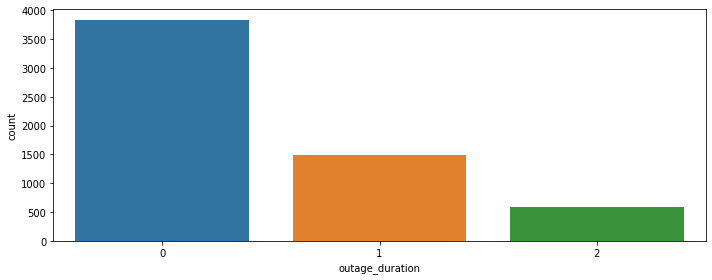

In [16]:
#count plot for Outage Duration 

plt.figure(figsize = (10,4))
sns.countplot(train_data['outage_duration'])
plt.tight_layout()
plt.show()

#### As there are three different Outage durations

- outage durations, `0` for no outage
- outage durations, `1` for short outages that last anywhere between a few minutes and a maximum of 2 hours
- outage durations, `2` for long outages that can last from 2 hours to sometimes even a couple of days.

### Plot with ID vs Area Code

In [17]:
import plotly.offline as pyo
import plotly.graph_objs as go
data = [go.Scatter(x=train_data['area_code'],
                 y=train_data['id'],
                 mode="markers",text=train_data["area_code"])]
layout=go.Layout(title="ID vs Area_code",xaxis={"title":"area_code"},yaxis=dict(title="ID"),hovermode="closest")
fig=go.Figure(data,layout)
fig.show()

#### From the plot most of the ID's are covered in particular area, As we can see in the graph, as the Number of users are reduces in some of the specific areas

                     ---------------------------------------------------------------------

### Plot with ID and Outage Durations.
- All the three Outage Durations

In [18]:
import plotly.offline as pyo
import plotly.graph_objs as go
data = [go.Scatter(x=train_data.loc[train_data.outage_duration==0,'area_code'],
                 y=train_data.loc[train_data.outage_duration==0,'id'],
                 mode="markers",text=train_data["outage_duration"]),
        go.Scatter(x=train_data.loc[train_data.outage_duration==1,'area_code'],
                 y=train_data.loc[train_data.outage_duration==1,'id'],
                 mode="markers",text=train_data["outage_duration"]),
       go.Scatter(x=train_data.loc[train_data.outage_duration==2,'area_code'],
                 y=train_data.loc[train_data.outage_duration==2,'id'],
                 mode="markers",text=train_data["outage_duration"])]
layout=go.Layout(title="ID vs Area Code",xaxis={"title":"area_code"},yaxis=dict(title="ID"),hovermode="closest")
fig=go.Figure(data,layout)
fig.show()

#### Checking the number of outage_duration
* As we can see that there are three levels of outages
- 0 for NO outages : trace 0 -> Blue circles 
- 1 for Few minutes to few hours : trace 1 -> Red circles
- 2 for Few Hours and more : trace 2 -> Green circles

#### By plotting the Data with respect to ID's and outage duration , we can see that the number of users and outage is evenlly distributed, It's like there is no specific user ID's are facing the outages, All number of users are facing the outages 

### Checking the Plot with respect to Outage Duration 0, In Area Vs ID

In [19]:
import plotly.offline as pyo
import plotly.graph_objs as go
data = [go.Scatter(x=train_data.loc[train_data.outage_duration==0,'area_code'],
                 y=train_data.loc[train_data.outage_duration==0,'id'],
                 mode="markers",text=train_data["outage_duration"])]
layout=go.Layout(title="ID vs Area Code with Outage Duration : 0",xaxis={"title":"area_code"},yaxis=dict(title="ID"),hovermode="closest")
fig=go.Figure(data,layout)
fig.show()

#### From the plot we see the most of the ID with Area are `Not` facing much problem

### Checking the Plot with respect to Outage Duration 1, In Area Vs ID

In [20]:
import plotly.offline as pyo
import plotly.graph_objs as go
data = [go.Scatter(x=train_data.loc[train_data.outage_duration==1,'area_code'],
                 y=train_data.loc[train_data.outage_duration==1,'id'],
                 mode="markers",text=train_data["outage_duration"])]
layout=go.Layout(title="ID vs Area Code Outage Duration : 1",xaxis={"title":"area_code"},yaxis=dict(title="ID"),hovermode="closest")
fig=go.Figure(data,layout)
fig.show()

### Checking the Plot with respect to Outage Duration 2, In Area Vs ID

In [21]:
import plotly.offline as pyo
import plotly.graph_objs as go
data = [go.Scatter(x=train_data.loc[train_data.outage_duration==2,'area_code'],
                 y=train_data.loc[train_data.outage_duration==2,'id'],
                 mode="markers",text=train_data["outage_duration"])]
layout=go.Layout(title="ID vs Area Code Outage Duration : 2",xaxis={"title":"area_code"},yaxis=dict(title="ID"),hovermode="closest")
fig=go.Figure(data,layout)
fig.show()

#### From the plot we can see that the few areas are having high outages compared to the other areas

#### Maximum Outage Duration With Respect to Area

In [22]:
train_data_outage = train_data.loc[train_data.outage_duration==2,'area_code'].value_counts()

In [23]:
train_data_outage

area_1100    28
area_1107    27
area_600     27
area_821     24
area_734     23
             ..
area_967      1
area_839      1
area_566      1
area_632      1
area_565      1
Name: area_code, Length: 135, dtype: int64

In [24]:
train_data['outage_duration'].value_counts()

0    3827
1    1496
2     581
Name: outage_duration, dtype: int64

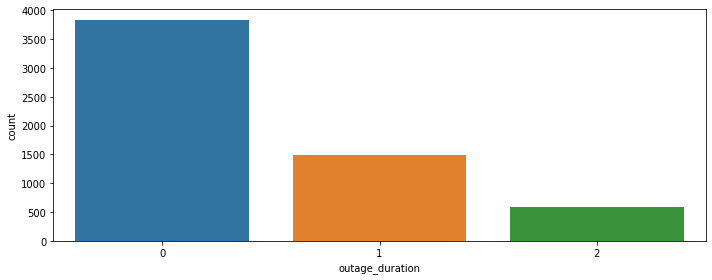

In [25]:
#count plot for Outage Duration 

plt.figure(figsize = (10,4))
sns.countplot(train_data['outage_duration'])
plt.tight_layout()
plt.show()

#### Outage for the users with percentage representations.

In [26]:
val=list(train_data['outage_duration'].value_counts())
for i in range(len(val)):
    print("Outage type",train_data['outage_duration'].value_counts().index[i],round(val[i]/sum(val)*100),'%')

Outage type 0 65 %
Outage type 1 25 %
Outage type 2 10 %


#### As we saw above the percentages of the Outage Durations, The visual representation of the same as we can see the number of counts of outages present in the data

#### Outage Duration 
##### Outage type 0 has 65% that is NO outage for those users,
##### Outage type 1 and 2 are facing outage breaks

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Outage_Data

#### ● `outage_data.csv`: For each of the event `id`s mentioned in the `train_data.csv` and `test_data.csv` files and also some additional `id`s there is a record of the `outage_type` that is stored in the dataset. There are `5` different `outage_type`'s recorded in the dataset.

##### Reading the csv File

In [27]:
outage_data = pd.read_csv('/gdrive/My Drive/PHD B78/data/outage_data.csv')
outage_data.head()

,id,outage_type
0,6597,outage_type_2
1,8011,outage_type_2
2,2597,outage_type_2
3,5022,outage_type_1
4,6852,outage_type_1


In [28]:
outage_data.shape

(18552, 2)

###### There are two columns and 18852 rows of ID
- ID : 18552
- Outage type : There are 5 Different Outage_types
- shape : (18552,2)

### Plotting the number of counts of  Outage Type

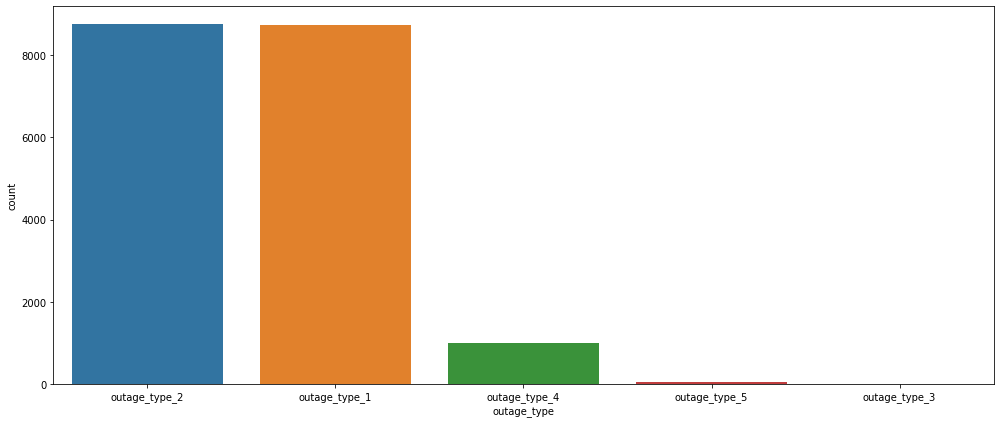

In [29]:
#count plot for Outage Duration

plt.figure(figsize = (14,6))
sns.countplot(outage_data['outage_type'])
plt.tight_layout()
plt.show()

#### There are 5 different types from outage type 1 to 5.
- Outage type 2 and Outage typw 1 is most repeated in the data 

In [30]:
outage_data['outage_type'].value_counts()

outage_type_2    8737
outage_type_1    8728
outage_type_4    1014
outage_type_5      65
outage_type_3       8
Name: outage_type, dtype: int64

Here we can see the value counts of each outage type

##### Let's look into the percentage of Outage type in the data

In [31]:
val=list(outage_data['outage_type'].value_counts())
for i in range(len(val)):
    print(outage_data['outage_type'].value_counts().index[i],round(val[i]/sum(val)*100),'%')

outage_type_2 47 %
outage_type_1 47 %
outage_type_4 5 %
outage_type_5 0 %
outage_type_3 0 %


### Removing the text

In [32]:
outage_data.outage_type=outage_data.outage_type.apply(lambda x: int(x.split("_")[2]))

In [33]:
outage_data.head()

,id,outage_type
0,6597,2
1,8011,2
2,2597,2
3,5022,1
4,6852,1


### Dummification of the Outage type

In [34]:
outage_type_dummies = pd.get_dummies(outage_data,columns=['outage_type'])


In [35]:
outage_type_dummies.head()

,id,outage_type_1,outage_type_2,outage_type_3,outage_type_4,outage_type_5
0,6597,0,1,0,0,0
1,8011,0,1,0,0,0
2,2597,0,1,0,0,0
3,5022,1,0,0,0,0
4,6852,1,0,0,0,0


In [36]:
outage_data.describe(include='all')

,id,outage_type
count,18552.000000,18552.000000
mean,9276.500000,1.649795
std,5355.645433,0.773591
min,1.000000,1.000000
25%,4638.750000,1.000000
50%,9276.500000,2.000000
75%,13914.250000,2.000000
max,18552.000000,5.000000


###### From the above describtion.
- total count is 18552
- Outage type 2 is repeated the most
- There are 5 level's of Outage type
- Frequency is 8737, i.e., the Outage type has been repeated in the record

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Server_Data

### ● `server_data.csv`: For each of the event `id`s mentioned in the `train_data.csv` and `test_data.csv` files and also some additional `id`s there is a record of the `transit_server_type` that is stored in the dataset. Transit Servers handle the requests and responses of the customers.


##### Looking into the first 5 rows of the data

In [8]:
server_data = pd.read_csv('/gdrive/My Drive/PHD B78/data/server_data.csv')
server_data.head()

,id,transit_server_type
0,6597,transit_server_type_11
1,8011,transit_server_type_15
2,2597,transit_server_type_15
3,5022,transit_server_type_15
4,5022,transit_server_type_11


In [9]:
server_data.shape

(31170, 2)

In [10]:
server_data.nunique().value_counts()

53       1
18552    1
dtype: int64

#### From the Server Data.
- there are two columns in the dataframe
- ID : 31170 and unique is 18552
- Server type : Total there are 53 Server's in the given data set

#### Checking the Value count of the server type.

In [40]:
server_count = server_data['transit_server_type'].value_counts()
server_count

transit_server_type_11    7888
transit_server_type_35    6615
transit_server_type_34    5927
transit_server_type_15    4395
transit_server_type_20    1458
transit_server_type_54     684
transit_server_type_13     582
transit_server_type_42     478
transit_server_type_44     466
transit_server_type_23     429
transit_server_type_14     330
transit_server_type_43     306
transit_server_type_22     223
transit_server_type_50     154
transit_server_type_10     145
transit_server_type_21     136
transit_server_type_18      73
transit_server_type_47      69
transit_server_type_26      65
transit_server_type_32      63
transit_server_type_30      60
transit_server_type_45      53
transit_server_type_24      46
transit_server_type_27      44
transit_server_type_29      42
transit_server_type_40      40
transit_server_type_46      38
transit_server_type_2       37
transit_server_type_28      32
transit_server_type_8       29
transit_server_type_6       28
transit_server_type_5       26
transit_

#### Checking the Value count with percentage wise

In [41]:
val=list(server_data['transit_server_type'].value_counts().head(15))
for i in range(len(val)):
    print(server_data['transit_server_type'].value_counts().index[i],round(val[i]/sum(val)*100),'%')

transit_server_type_11 26 %
transit_server_type_35 22 %
transit_server_type_34 20 %
transit_server_type_15 15 %
transit_server_type_20 5 %
transit_server_type_54 2 %
transit_server_type_13 2 %
transit_server_type_42 2 %
transit_server_type_44 2 %
transit_server_type_23 1 %
transit_server_type_14 1 %
transit_server_type_43 1 %
transit_server_type_22 1 %
transit_server_type_50 1 %
transit_server_type_10 0 %


### Plotting with ID vs Transit Server Type

In [42]:
# x and y given as array_like objects
import plotly.express as px
fig = px.scatter(server_data['id'], server_data['transit_server_type'])
fig.show()

##### ID in X-axis and Transit server in Y-axis.
- In the scartted plot Few ID's are using few servers
- Likely Many Users are opting to very servers.

#### As from the above plot we can see.
- Server 11 has most users : 25% of users from the given data, i.e., 7888 times it has been repeated
- Server 35 has next number of users.

#### Top Five server Types used the most in the Given Data.

In [43]:
server_count.head()

transit_server_type_11    7888
transit_server_type_35    6615
transit_server_type_34    5927
transit_server_type_15    4395
transit_server_type_20    1458
Name: transit_server_type, dtype: int64

In [44]:
server_data.head()

,id,transit_server_type
0,6597,transit_server_type_11
1,8011,transit_server_type_15
2,2597,transit_server_type_15
3,5022,transit_server_type_15
4,5022,transit_server_type_11


#### Let's Remove the text from the transit server type.

In [45]:
server_data.transit_server_type=server_data.transit_server_type.apply(lambda x: int(x.split("_")[3]))

##### After removing the text from the column transit_server_type, the top 10 rows 

In [46]:
server_data.head(10)

,id,transit_server_type
0,6597,11
1,8011,15
2,2597,15
3,5022,15
4,5022,11
5,6852,11
6,6852,15
7,5611,15
8,14838,15
9,14838,11


### Plotting Server type Count

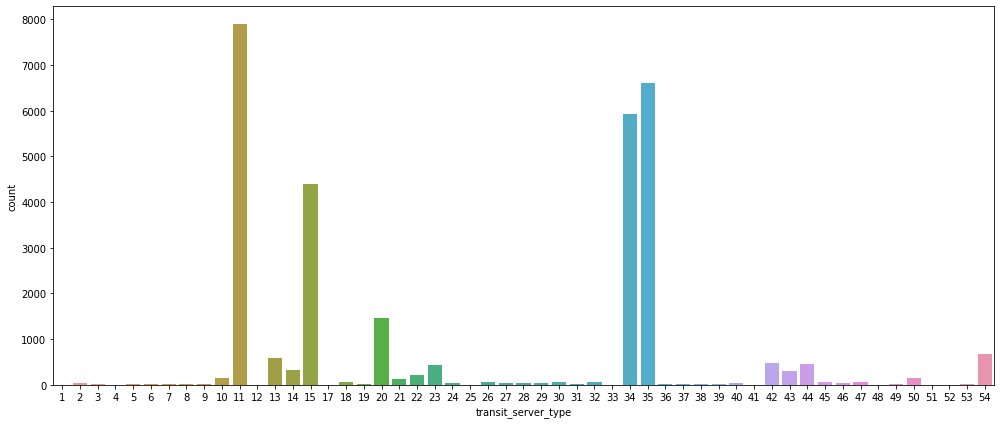

In [47]:
#count plot for transit server type

plt.figure(figsize = (14,6))
sns.countplot(server_data['transit_server_type'])
plt.tight_layout()
plt.show()

#### Exploring the Value Counts of the Server Data

In [48]:
server_data['transit_server_type'].value_counts().sum()

31170

In [49]:
server_data.shape

(31170, 2)

In [50]:
import plotly
import plotly.offline as pyoff
# import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

%matplotlib notebook

In [51]:
server_plot=server_data.transit_server_type.value_counts()

In [52]:
data = [go.Bar(
            x=server_plot.index,
            y=server_plot,
            text = server_plot,
            textposition = 'auto')]
    

iplot(data)

#### Dummification of the server type as we know there are 53 server types.

In [53]:
server_type_dummies = pd.get_dummies(server_data,columns=['transit_server_type'])

In [54]:
server_type_dummies.head()

,id,transit_server_type_1,transit_server_type_2,transit_server_type_3,transit_server_type_4,transit_server_type_5,transit_server_type_6,transit_server_type_7,transit_server_type_8,transit_server_type_9,transit_server_type_10,transit_server_type_11,transit_server_type_12,transit_server_type_13,transit_server_type_14,transit_server_type_15,transit_server_type_17,transit_server_type_18,transit_server_type_19,transit_server_type_20,transit_server_type_21,transit_server_type_22,transit_server_type_23,transit_server_type_24,transit_server_type_25,transit_server_type_26,transit_server_type_27,transit_server_type_28,transit_server_type_29,transit_server_type_30,transit_server_type_31,transit_server_type_32,transit_server_type_33,transit_server_type_34,transit_server_type_35,transit_server_type_36,transit_server_type_37,transit_server_type_38,transit_server_type_39,transit_server_type_40,transit_server_type_41,transit_server_type_42,transit_server_type_43,transit_server_type_44,transit_server_type_45,transit_server_type_46,transit_server_type_47,transit_server_type_48,transit_server_type_49,transit_server_type_50,transit_server_type_51,transit_server_type_52,transit_server_type_53,transit_server_type_54
0,6597,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2597,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5022,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5022,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
server_type_dummies.shape

(31170, 54)

##### After Dummification we get 53 new columns and with ID we have 54 columns and 31170 ID

In [56]:
server_data.shape

(31170, 2)

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Report Data

### ● `report_data.csv`: For each event `id` there are `log_report_type` and `volume` columns are recorded. `log_report_type` is a type of the recorded report generated by a technical team member after evaluating the outage. `volume` is the volume of data handled in the area at the time of report in custom company specific units.


#### Reading the Report Data 

In [57]:
report_data = pd.read_csv('/gdrive/My Drive/PHD B78/data/report_data.csv')

#### Taking a look at top five rows from the report data

In [58]:
report_data.head()

,id,log_report_type,volume
0,6597,log_report_type_68,6
1,8011,log_report_type_68,7
2,2597,log_report_type_68,1
3,5022,log_report_type_172,2
4,5022,log_report_type_56,1


In [59]:
report_data.shape

(58671, 3)

In [60]:
report_data.nunique()

id                 18552
log_report_type      386
volume               341
dtype: int64

#### Report Data: There are three columns
- ID : 58671
- Log_report_type: Has 386 log report customer service record issue
- Volume : There are 341 Volumes, for 10 minutes prior to the time of recording the observation as per custom company specific units.

#### Value Count for Log Report Type

In [61]:
log_report_ = report_data['log_report_type'].value_counts()

In [62]:
log_report_.head(10)

log_report_type_312    5267
log_report_type_232    4754
log_report_type_82     3472
log_report_type_203    2823
log_report_type_313    2145
log_report_type_233    1901
log_report_type_307    1597
log_report_type_54     1573
log_report_type_170    1526
log_report_type_71     1514
Name: log_report_type, dtype: int64

#### Looking into the top 10 report's issued by the custombers, Frequently more in the given Data

### Let's See the Percentage for the Log Report Type

In [63]:
val=list(report_data['log_report_type'].value_counts().head(20))
for i in range(len(val)):
    print(report_data['log_report_type'].value_counts().index[i],round(val[i]/sum(val)*100),'%')

log_report_type_312 14 %
log_report_type_232 12 %
log_report_type_82 9 %
log_report_type_203 7 %
log_report_type_313 6 %
log_report_type_233 5 %
log_report_type_307 4 %
log_report_type_54 4 %
log_report_type_170 4 %
log_report_type_71 4 %
log_report_type_315 4 %
log_report_type_134 4 %
log_report_type_80 3 %
log_report_type_235 3 %
log_report_type_193 3 %
log_report_type_219 3 %
log_report_type_68 3 %
log_report_type_227 3 %
log_report_type_314 2 %
log_report_type_201 2 %


### Plot for Log Report Type

In [64]:
report_largest=report_data.groupby('log_report_type').volume.sum().nlargest(30)

In [65]:
data = [go.Bar(
            x=report_largest.index,
            y=report_largest,
            text = report_largest,
            textposition = 'auto')]
    

iplot(data)

### Removing the text from the Log Report Type column and keeping numerator alone

In [66]:
report_data.log_report_type=report_data.log_report_type.apply(lambda x: int(x.split("_")[3]))

In [67]:
report_data.head()

,id,log_report_type,volume
0,6597,68,6
1,8011,68,7
2,2597,68,1
3,5022,172,2
4,5022,56,1


In [68]:
#count plot for Log Report Type

plt.figure(figsize = (14,6))
sns.countplot(report_data['log_report_type'].value_counts())
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### The Above plot represents the number of reports in assending order of value counts in top order of log report by customber complents

#### Top records of log report type receved by the customer service representatives

In [69]:
log_report_.head(10)

log_report_type_312    5267
log_report_type_232    4754
log_report_type_82     3472
log_report_type_203    2823
log_report_type_313    2145
log_report_type_233    1901
log_report_type_307    1597
log_report_type_54     1573
log_report_type_170    1526
log_report_type_71     1514
Name: log_report_type, dtype: int64

#### From the plot as we have explored, The log report is varied with the ID user and log report

In [70]:
report_data.head()

,id,log_report_type,volume
0,6597,68,6
1,8011,68,7
2,2597,68,1
3,5022,172,2
4,5022,56,1


In [71]:
report_data.shape

(58671, 3)

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Broadband Data

### ● `broadband_data.csv`: For each of the event `id`s mentioned in the `train_data.csv` and `test_data.csv` files and also some additional `id`s there is a record of the `broadband_type` that is stored in the dataset. There are `10 different types` of broadbands that are observed in the dataset

#### Reading the Broadband Data

In [72]:
broadband_data = pd.read_csv('/gdrive/My Drive/PHD B78/data/broadband_data.csv')

In [73]:
broadband_data.head()

,id,broadband_type
0,6597,broadband_type_8
1,8011,broadband_type_8
2,2597,broadband_type_8
3,5022,broadband_type_8
4,6852,broadband_type_8


In [74]:
broadband_data.shape

(21076, 2)

In [75]:
broadband_data.nunique()

id                18552
broadband_type       10
dtype: int64

#### BroadBand Data:
- ID : 21076, Unique ID : 18552
- Broadband type : 10 Broadband types avaliable 

### Value Count for Broadband Data 

In [76]:
broadband_data['broadband_type'].value_counts()

broadband_type_8     10268
broadband_type_2      8918
broadband_type_6       582
broadband_type_7       498
broadband_type_4       330
broadband_type_9       190
broadband_type_3       145
broadband_type_10       73
broadband_type_1        58
broadband_type_5        14
Name: broadband_type, dtype: int64

In [77]:
broadband_plot = broadband_data.broadband_type.value_counts()

In [78]:
data = [go.Bar(
            x=broadband_plot.index,
            y=np.round(broadband_plot.astype(float)/broadband_plot.values.sum(),2),
            text = np.round(broadband_plot.astype(float)/broadband_plot.values.sum(),2),
            textposition = 'auto')]
    

iplot(data)

#### Broadband types description
- broadband_type_8 : 'ADSL 1'
- broadband_type_2 : 'ADSL 2'
- broadband_type_6 : 'ADSL 2+' 
- broadband_type_7 : 'Cable'
- broadband_type_4 : 'Fiber 1'
- broadband_type_9 : 'BPL'
- broadband_type_3 : 'Fiber 2'
- broadband_type_10 : 'Fiber High Speed'
- broadband_type_1 : 'Fiber Ultra'
- broadband_type_5 : 'Fiber Ultra Max'
    
** From the data Broadband type 8 : 'ADSL 1' is used more in the given data, then broadband type 2 and so onn.

### Percentage of Broadband types through Value counts in the Data

In [79]:
val=list(broadband_data['broadband_type'].value_counts())
for i in range(len(val)):
    print(broadband_data['broadband_type'].value_counts().index[i],round(val[i]/sum(val)*100),'%')

broadband_type_8 49 %
broadband_type_2 42 %
broadband_type_6 3 %
broadband_type_7 2 %
broadband_type_4 2 %
broadband_type_9 1 %
broadband_type_3 1 %
broadband_type_10 0 %
broadband_type_1 0 %
broadband_type_5 0 %


### Plot for Broadband types

In [91]:
#count plot for broadband type

plt.figure(figsize = (14,6))
sns.countplot(broadband_data['broadband_type'])
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### From the plot we can see the usage of Broadband by the used as per the data given.

### Removing the Text from the Broadband type and keeping numbers.

In [92]:
broadband_data.broadband_type=broadband_data.broadband_type.apply(lambda x: int(x.split("_")[2]))

In [93]:
broadband_data.head()

,id,broadband_type
0,6597,8
1,8011,8
2,2597,8
3,5022,8
4,6852,8


### Dummification of Broadband type

In [94]:
broadband_type_dummies = pd.get_dummies(broadband_data,columns=['broadband_type'])

In [95]:
broadband_type_dummies

,id,broadband_type_1,broadband_type_2,broadband_type_3,broadband_type_4,broadband_type_5,broadband_type_6,broadband_type_7,broadband_type_8,broadband_type_9,broadband_type_10
0,6597,0,0,0,0,0,0,0,1,0,0
1,8011,0,0,0,0,0,0,0,1,0,0
2,2597,0,0,0,0,0,0,0,1,0,0
3,5022,0,0,0,0,0,0,0,1,0,0
4,6852,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21071,3761,0,0,0,0,0,0,0,1,0,0
21072,8720,0,0,0,0,0,0,0,1,0,0
21073,6488,0,0,0,0,0,0,0,1,0,0
21074,878,0,0,0,0,0,0,0,1,0,0


#### After Dummifing the broadband type we get (21076x11) columns

In [96]:
val=list(broadband_data['broadband_type'].value_counts())
for i in range(len(val)):
    print(broadband_data['broadband_type'].value_counts().index[i],round(val[i]/sum(val)*100),'%')

8 49 %
2 42 %
6 3 %
7 2 %
4 2 %
9 1 %
3 1 %
10 0 %
1 0 %
5 0 %


#### As we can see that Broadband type 8 : ADSL1 is used more in the data

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Merging the files 

In [97]:
train_data = pd.read_csv('/gdrive/My Drive/PHD B78/data/train_data.csv')
broadband_data = pd.read_csv('/gdrive/My Drive/PHD B78/data/broadband_data.csv')
outage_data = pd.read_csv('/gdrive/My Drive/PHD B78/data/outage_data.csv')
report_data = pd.read_csv('/gdrive/My Drive/PHD B78/data/report_data.csv')
server_data = pd.read_csv('/gdrive/My Drive/PHD B78/data/server_data.csv')

### Checking the Unique ID's From all the Data set's

In [98]:
print("Number of unique ID's in Train Data      : ",train_data.id.nunique())
print("Number of unique ID's in Broadband Data  : ",broadband_data.id.nunique())
print("Number of unique ID's in Server Data     : ",server_data.id.nunique())
print("Number of unique ID's in Outage Data     : ",outage_data.id.nunique())
print("Number of unique ID's in Report Data     : ",report_data.id.nunique()) 

Number of unique ID's in Train Data      :  5904
Number of unique ID's in Broadband Data  :  18552
Number of unique ID's in Server Data     :  18552
Number of unique ID's in Outage Data     :  18552
Number of unique ID's in Report Data     :  18552


### Merging the Train Data with Broadband Data

In [99]:
train_broadband_combined = pd.merge(train_data,broadband_data,left_on = ['id'],
                               right_on = ['id'],how='left')

In [100]:
train_broadband_combined.head()

,id,area_code,outage_duration,broadband_type
0,13366,area_415,1,broadband_type_2
1,6783,area_474,0,broadband_type_2
2,9519,area_931,1,broadband_type_8
3,10202,area_700,1,broadband_type_8
4,4555,area_600,2,broadband_type_8


In [101]:
##ploting the data sets to check the inputs with train data
broad_band=train_broadband_combined.broadband_type.value_counts()
broad_band.head(10).plot(kind="bar",figsize=(10,10))
broad_band.head(10)

<IPython.core.display.Javascript object>

broadband_type_8     3246
broadband_type_2     2851
broadband_type_6      201
broadband_type_7      179
broadband_type_4      114
broadband_type_9       61
broadband_type_3       44
broadband_type_10      28
broadband_type_1       27
broadband_type_5        3
Name: broadband_type, dtype: int64

<IPython.core.display.Javascript object>

### Answering the Questions
● Which areas are most prone to long outage durations?

● Which broadband types are suspect of long outage durations?

● Any other recommendations to improve the detection of outage durations.

### To answer the question!!

- We have merged the train data with broadband data

In [102]:
train_broadband_outage = train_broadband_combined.loc[train_broadband_combined.outage_duration==2,'broadband_type'].value_counts()

In [103]:
train_broadband_outage

broadband_type_8     544
broadband_type_2      82
broadband_type_6      26
broadband_type_4      17
broadband_type_1      10
broadband_type_7       9
broadband_type_9       4
broadband_type_3       4
broadband_type_5       3
broadband_type_10      1
Name: broadband_type, dtype: int64

#### By locating the Outage Duration == 2 the most prone outage duration, filtering with broadband type we got!!!
#### Broadband type 8 has most number of outages 

### Creating an Long outage my taking outage duration = 2 alone!!

In [104]:
long_outage = train_data['outage_duration']==2
long_outage.head()

0    False
1    False
2    False
3    False
4     True
Name: outage_duration, dtype: bool

In [105]:
long_outage_ = train_data[long_outage]

In [106]:
long_outage_.head()

,id,area_code,outage_duration
4,4555,area_600,2
16,1373,area_962,2
24,4209,area_1086,2
32,8984,area_976,2
34,14361,area_704,2


### Plot with Area code vs Outage Duration

In [107]:
count=long_outage_.area_code.value_counts()
count.head(10).plot(kind="bar",figsize=(10,10))
count.head(10)

<IPython.core.display.Javascript object>

area_1100    28
area_1107    27
area_600     27
area_821     24
area_734     23
area_704     19
area_1019    18
area_810     18
area_834     17
area_798     17
Name: area_code, dtype: int64

<IPython.core.display.Javascript object>

#### From the above graph we clearly see that Area_1100 has more Outages and is more Prone to outages!!!
#### And Other Top ten areas most prone to outages are..
- area_1100    28
- area_600     27
- area_1107    27
- area_821     24
- area_734     23
- area_704     19
- area_1019    18
- area_810     18
- area_684     17
- area_798     17

### Defining a function to remove the text from the area code

In [108]:
def str_to_num(string):
    return int(string.split("_")[1])

In [109]:
train_data["area_code"]=train_data["area_code"].apply(str_to_num)

In [110]:
train_data.head()

,id,area_code,outage_duration
0,13366,415,1
1,6783,474,0
2,9519,931,1
3,10202,700,1
4,4555,600,2


### Merging the Train Data with Outage Data

In [111]:
merge_1 = train_data.merge(outage_data,how="left",left_on=["id"],right_on=["id"])

In [112]:
merge_1.head()

,id,area_code,outage_duration,outage_type
0,13366,415,1,outage_type_4
1,6783,474,0,outage_type_2
2,9519,931,1,outage_type_2
3,10202,700,1,outage_type_1
4,4555,600,2,outage_type_2


In [113]:
merge_1.set_index("id",inplace=True)

In [114]:
merge_1.describe()

,area_code,outage_duration
count,5904.000000,5904.000000
mean,623.909045,0.450203
std,320.360280,0.666642
min,1.000000,0.000000
25%,375.000000,0.000000
50%,661.000000,0.000000
75%,892.000000,1.000000
max,1126.000000,2.000000


#### Creating a new feature to group by area code and outage duration

In [115]:
merge_1["num"]=merge_1.groupby(['area_code',"outage_duration"]).cumcount()+1

In [116]:
merge_1[(merge_1["area_code"]==1) & (merge_1["outage_duration"]==1)]

,area_code,outage_duration,outage_type,num
id,,,,
9664,1,1,outage_type_2,1
3952,1,1,outage_type_1,2
15952,1,1,outage_type_1,3
1235,1,1,outage_type_1,4
14595,1,1,outage_type_2,5
5280,1,1,outage_type_1,6
17041,1,1,outage_type_1,7


#### Number `Num` represents number of outages of each type in an area to understand in which area what kind of outage is more so that we can focus on reducing it

In [117]:
merge_1.num.value_counts().head(10)

1     1386
2      862
3      586
4      434
5      342
6      285
7      241
8      209
9      183
10     166
Name: num, dtype: int64

### Plot with respect to Number of  Cases registered

In [118]:
data=[go.Histogram(x=merge_1["num"])]
layout=go.Layout(title="Histogram")
layout=go.Layout(title="number of cases",xaxis={"title":"number of cases"},yaxis=dict(title="count of no of cases"),hovermode="closest")
fig=go.Figure(data,layout)
fig.show()

#### we can understand how many cases are common in an area like in general, we can find minimum of 3 cases there in 586 areas.

### Plot with respect to Number of cases vs Area

In [119]:
import plotly.offline as pyo
import plotly.graph_objs as go
data = [go.Scatter(x=merge_1.loc[merge_1.outage_duration==0,'area_code'],
                 y=merge_1.loc[merge_1.outage_duration==0,'num'],
                 mode="markers",text=merge_1["outage_duration"]),
        go.Scatter(x=merge_1.loc[merge_1.outage_duration==1,'area_code'],
                 y=merge_1.loc[merge_1.outage_duration==1,'num'],
                 mode="markers",text=merge_1["outage_duration"]),
       go.Scatter(x=merge_1.loc[merge_1.outage_duration==2,'area_code'],
                 y=merge_1.loc[merge_1.outage_duration==2,'num'],
                 mode="markers",text=merge_1["outage_duration"])]
layout=go.Layout(title="num vs area_code",xaxis={"title":"area_code"},yaxis=dict(title="num"),hovermode="closest")
fig=go.Figure(data,layout)
fig.show()


#### To understand in which area, which kind of outage is more, So that we  can focus on reducing it, i.e., to get more customer churn in an area we should concentrate on which kind of outage type.

### Merging Train Data with Server Data

In [120]:
server_data

,id,transit_server_type
0,6597,transit_server_type_11
1,8011,transit_server_type_15
2,2597,transit_server_type_15
3,5022,transit_server_type_15
4,5022,transit_server_type_11
...,...,...
31165,3761,transit_server_type_11
31166,8720,transit_server_type_11
31167,6488,transit_server_type_11
31168,878,transit_server_type_11


In [121]:
merge_2=server_data.merge(train_data, on='id')

In [122]:
merge_2.head()

,id,transit_server_type,area_code,outage_duration
0,8011,transit_server_type_15,1,0
1,2588,transit_server_type_15,1,0
2,2588,transit_server_type_11,1,0
3,4848,transit_server_type_11,1,0
4,4848,transit_server_type_15,1,0


### Checking for Any Null values

In [123]:
merge_2.isnull().sum()

id                     0
transit_server_type    0
area_code              0
outage_duration        0
dtype: int64

### Checking for Unique Values

In [124]:
merge_2.nunique()

id                     5904
transit_server_type      49
area_code               876
outage_duration           3
dtype: int64

In [125]:
merge_2.shape

(9968, 4)

### Assigning values counts to the DataFrame!!

In [126]:
transit_server_type_unq=pd.DataFrame(merge_2.transit_server_type.value_counts())
transit_server_type_unq.head()

,transit_server_type
transit_server_type_11,2473
transit_server_type_35,2158
transit_server_type_34,1925
transit_server_type_15,1370
transit_server_type_20,437


### Creating New Column to check with Percentage transit Server Type

In [127]:
transit_server_type_unq["percen_trn"]=merge_2.transit_server_type.value_counts(normalize=True)*100

In [128]:
transit_server_type_unq.head()

,transit_server_type,percen_trn
transit_server_type_11,2473,24.809390
transit_server_type_35,2158,21.649278
transit_server_type_34,1925,19.311798
transit_server_type_15,1370,13.743981
transit_server_type_20,437,4.384029


In [129]:
merge_2.head()

,id,transit_server_type,area_code,outage_duration
0,8011,transit_server_type_15,1,0
1,2588,transit_server_type_15,1,0
2,2588,transit_server_type_11,1,0
3,4848,transit_server_type_11,1,0
4,4848,transit_server_type_15,1,0


### Creating New Feature `Num` to Group by Server Type and Area Code

In [130]:
merge_2["num"]=merge_2.groupby(['transit_server_type','area_code']).cumcount()+1


In [131]:
merge_2.head()

,id,transit_server_type,area_code,outage_duration,num
0,8011,transit_server_type_15,1,0,1
1,2588,transit_server_type_15,1,0,2
2,2588,transit_server_type_11,1,0,1
3,4848,transit_server_type_11,1,0,2
4,4848,transit_server_type_15,1,0,3


### Plotting Number of Servers vs Area Code

In [132]:
import plotly.offline as pyo
import plotly.graph_objs as go
data = [go.Scatter(x=merge_2.loc[:,'area_code'],
                 y=merge_2.loc[:,'num'],
                 mode="markers")]
layout=go.Layout(title="Number of Servers vs Area Code",xaxis={"title":"area_code"},yaxis=dict(title="number of servers"),hovermode="closest")
fig=go.Figure(data,layout)
fig.show()


#### From the above plot, To understand how Servers are divided with respect to Area-wise 

### Merging Train Data with Broadband Data

In [133]:
train_data_ = pd.read_csv('/gdrive/My Drive/PHD B78/data/train_data.csv')
broadband_data_ = pd.read_csv('/gdrive/My Drive/PHD B78/data/broadband_data.csv')

In [134]:
train_broadband_combined_ = pd.merge(train_data,broadband_data_,left_on = ['id'],
                               right_on = ['id'],how='left')

#### Assigning Max Outage Duration : 2 to Long Outage 

In [135]:
long_outage_2 = train_broadband_combined_['outage_duration']==2
long_outage_2.head()

0    False
1    False
2    False
3    False
4     True
Name: outage_duration, dtype: bool

#### Taking Long Outage 2.

In [136]:
long_outage_2_=train_broadband_combined_[long_outage_2]

In [137]:
long_outage_2_.head()

,id,area_code,outage_duration,broadband_type
4,4555,600,2,broadband_type_8
16,1373,962,2,broadband_type_8
24,4209,1086,2,broadband_type_8
33,8984,976,2,broadband_type_8
35,14361,704,2,broadband_type_8


### Plotting the Broadband with Max Outage Duration

In [138]:
broad_band=long_outage_2_.broadband_type.value_counts()
broad_band.head(10).plot(kind="bar",figsize=(10,10))
broad_band.head(10)

<IPython.core.display.Javascript object>

broadband_type_8     544
broadband_type_2      82
broadband_type_6      26
broadband_type_4      17
broadband_type_1      10
broadband_type_7       9
broadband_type_9       4
broadband_type_3       4
broadband_type_5       3
broadband_type_10      1
Name: broadband_type, dtype: int64

<IPython.core.display.Javascript object>

#### From the Above Plot, It is clear that Broadband type 8 has Highest and longest Outage Duration

### Merging Train Data with Server Data

In [139]:
train_data_ = pd.read_csv('/gdrive/My Drive/PHD B78/data/train_data.csv')
server_data_ = pd.read_csv('/gdrive/My Drive/PHD B78/data/server_data.csv')

In [140]:
train_server_combined_1 = pd.merge(train_data_,server_data_,left_on = ['id'],
                               right_on = ['id'],how='left')

In [141]:
train_server_combined_1

,id,area_code,outage_duration,transit_server_type
0,13366,area_415,1,transit_server_type_35
1,6783,area_474,0,transit_server_type_35
2,6783,area_474,0,transit_server_type_34
3,9519,area_931,1,transit_server_type_15
4,10202,area_700,1,transit_server_type_11
...,...,...,...,...
9963,10475,area_821,0,transit_server_type_11
9964,10675,area_798,2,transit_server_type_15
9965,14714,area_210,0,transit_server_type_35
9966,14714,area_210,0,transit_server_type_34


#### Assigning Outage 2 to long outage

In [142]:
long_outage_3 = train_server_combined_1['outage_duration']==2
long_outage_3.head()

0    False
1    False
2    False
3    False
4    False
Name: outage_duration, dtype: bool

In [143]:
long_outage_3_=train_server_combined_1[long_outage_3]

In [144]:
long_outage_3_.head()

,id,area_code,outage_duration,transit_server_type
5,4555,area_600,2,transit_server_type_15
23,1373,area_962,2,transit_server_type_15
24,1373,area_962,2,transit_server_type_11
35,4209,area_1086,2,transit_server_type_15
47,8984,area_976,2,transit_server_type_15


### Plotting  Server type with Outage type

In [145]:
server_outage=long_outage_3_.transit_server_type.value_counts()
server_outage.head(10)
server_outage.head(10).plot(kind="bar",figsize=(10,10))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Transit server type 15 and 11 is more in the data as the custombers are using it more and also prone to outages

### Merge 01 with train and Server data 

In [146]:
train_server_merge_1 = pd.merge(train_data,server_data,left_on = ['id'],
                               right_on = ['id'],how='left')

In [147]:
train_server_merge_1.head(5)

,id,area_code,outage_duration,transit_server_type
0,13366,415,1,transit_server_type_35
1,6783,474,0,transit_server_type_35
2,6783,474,0,transit_server_type_34
3,9519,931,1,transit_server_type_15
4,10202,700,1,transit_server_type_11


In [148]:
train_server_merge_1.shape

(9968, 4)

### Merge 02 : Train with Outage Data

In [149]:
train_outage_merge_02 = pd.merge(train_data,outage_data,left_on = ['id'],
                               right_on = ['id'],how='left')

In [150]:
train_outage_merge_02.head()

,id,area_code,outage_duration,outage_type
0,13366,415,1,outage_type_4
1,6783,474,0,outage_type_2
2,9519,931,1,outage_type_2
3,10202,700,1,outage_type_1
4,4555,600,2,outage_type_2


In [151]:
train_outage_merge_02.shape

(5904, 4)

In [154]:
plt.figure(figsize=(10,5))
sns.countplot(x="outage_type", hue="outage_duration", data=train_outage_merge_02)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [155]:
temp = train_outage_merge_02.area_code.value_counts().head(50)

In [156]:
len(temp)

50

In [157]:
data = [go.Bar(
            x=temp.index,
            y=temp)]
iplot(data)

### Merge 03 : Train with Report Data

In [158]:
train_report_merge_03 = pd.merge(train_data,report_data,left_on = ['id'],
                               right_on = ['id'],how='left')

In [159]:
train_report_merge_03.head()

,id,area_code,outage_duration,log_report_type,volume
0,13366,415,1,log_report_type_312,1
1,6783,474,0,log_report_type_312,2
2,6783,474,0,log_report_type_233,1
3,6783,474,0,log_report_type_232,1
4,6783,474,0,log_report_type_315,2


In [160]:
train_report_merge_03.shape

(18995, 5)

### Merge 04 : Train Data with Broadband Data

In [161]:
broadband_data['last_digit']=broadband_data['broadband_type'].apply(lambda x: int(x.split("_")[2]))
broadband_data['classification']=broadband_data['last_digit'].apply(lambda x: 'DSL' if x==8 else ('DSL' if x==2 else('DSL' if x==6 else('Cable' if x==7 else('BPL' if x==9 else 'Fibre')))))

In [172]:
train_broadband_merge_04 = pd.merge(train_data,broadband_data,left_on = ['id'],
                               right_on = ['id'],how='left')

In [163]:
train_broadband_merge_04.head()

,id,area_code,outage_duration,broadband_type,last_digit,classification
0,13366,415,1,broadband_type_2,2,DSL
1,6783,474,0,broadband_type_2,2,DSL
2,9519,931,1,broadband_type_8,8,DSL
3,10202,700,1,broadband_type_8,8,DSL
4,4555,600,2,broadband_type_8,8,DSL


In [164]:
train_broadband_merge_04.shape

(6754, 6)

In [165]:
train_broadband_merge_04=train_broadband_merge_04.loc[train_broadband_merge_04.outage_duration==2].classification.value_counts()

In [166]:
data = [go.Bar(
            x=train_broadband_merge_04.index,
            y=np.round(train_broadband_merge_04.astype(float)/train_broadband_merge_04.values.sum(),2),
            text = np.round(train_broadband_merge_04.astype(float)/train_broadband_merge_04.values.sum(),2),
            textposition = 'auto')]
    

iplot(data)

#### Based on domain knowledge we know that the types of broadband connects can be classified into Digital subscriber line(DSL), Cable modem, Fibre and Broadband over powerlines (BPL)

### Merging with Train, Server and Outage Individually 

In [167]:
train_server_outage = pd.merge(train_server_merge_1,train_outage_merge_02,left_on = ['id'],
                               right_on = ['id'],how='left')

In [168]:
train_server_outage.head()

,id,area_code_x,outage_duration_x,transit_server_type,area_code_y,outage_duration_y,outage_type
0,13366,415,1,transit_server_type_35,415,1,outage_type_4
1,6783,474,0,transit_server_type_35,474,0,outage_type_2
2,6783,474,0,transit_server_type_34,474,0,outage_type_2
3,9519,931,1,transit_server_type_15,931,1,outage_type_2
4,10202,700,1,transit_server_type_11,700,1,outage_type_1


In [169]:
train_server_outage.shape

(9968, 7)

### Merging Train Data, Broadband Data, Report Data

In [173]:
train_broadband_report = pd.merge(train_broadband_merge_04,train_report_merge_03,left_on = ['id'],
                               right_on = ['id'],how='left')

In [174]:
train_broadband_report.head()

,id,area_code_x,outage_duration_x,broadband_type,last_digit,classification,area_code_y,outage_duration_y,log_report_type,volume
0,13366,415,1,broadband_type_2,2,DSL,415,1,log_report_type_312,1
1,6783,474,0,broadband_type_2,2,DSL,474,0,log_report_type_312,2
2,6783,474,0,broadband_type_2,2,DSL,474,0,log_report_type_233,1
3,6783,474,0,broadband_type_2,2,DSL,474,0,log_report_type_232,1
4,6783,474,0,broadband_type_2,2,DSL,474,0,log_report_type_315,2


In [175]:
train_broadband_report.shape

(22679, 10)

### Final Merge for EDA and Visualization

In [176]:
final_merge = pd.merge(train_server_outage,train_broadband_report,left_on = ['id'],
                               right_on = ['id'],how='left')

In [177]:
final_merge.head()

,id,area_code_x_x,outage_duration_x_x,transit_server_type,area_code_y_x,outage_duration_y_x,outage_type,area_code_x_y,outage_duration_x_y,broadband_type,last_digit,classification,area_code_y_y,outage_duration_y_y,log_report_type,volume
0,13366,415,1,transit_server_type_35,415,1,outage_type_4,415,1,broadband_type_2,2,DSL,415,1,log_report_type_312,1
1,6783,474,0,transit_server_type_35,474,0,outage_type_2,474,0,broadband_type_2,2,DSL,474,0,log_report_type_312,2
2,6783,474,0,transit_server_type_35,474,0,outage_type_2,474,0,broadband_type_2,2,DSL,474,0,log_report_type_233,1
3,6783,474,0,transit_server_type_35,474,0,outage_type_2,474,0,broadband_type_2,2,DSL,474,0,log_report_type_232,1
4,6783,474,0,transit_server_type_35,474,0,outage_type_2,474,0,broadband_type_2,2,DSL,474,0,log_report_type_315,2


In [178]:
final_merge = final_merge.drop_duplicates('id')

In [179]:
final_merge.shape

(5904, 16)

In [180]:
final_merge.nunique().value_counts

<bound method IndexOpsMixin.value_counts of id                     5904
area_code_x_x           876
outage_duration_x_x       3
transit_server_type      44
area_code_y_x           876
outage_duration_y_x       3
outage_type               5
area_code_x_y           876
outage_duration_x_y       3
broadband_type            9
last_digit                9
classification            4
area_code_y_y           876
outage_duration_y_y       3
log_report_type         213
volume                  139
dtype: int64>

In [181]:
type_=pd.crosstab(final_merge['outage_duration_x_x'],final_merge['outage_type']) 
type_.plot(kind="bar", stacked=True, figsize=(8,6))
type_

<IPython.core.display.Javascript object>

outage_type,outage_type_1,outage_type_2,outage_type_3,outage_type_4,outage_type_5
outage_duration_x_x,,,,,
0,1418,2129,4,267,9
1,900,547,0,39,10
2,382,199,0,0,0


<IPython.core.display.Javascript object>

In [182]:
final_merge.head()

,id,area_code_x_x,outage_duration_x_x,transit_server_type,area_code_y_x,outage_duration_y_x,outage_type,area_code_x_y,outage_duration_x_y,broadband_type,last_digit,classification,area_code_y_y,outage_duration_y_y,log_report_type,volume
0,13366,415,1,transit_server_type_35,415,1,outage_type_4,415,1,broadband_type_2,2,DSL,415,1,log_report_type_312,1
1,6783,474,0,transit_server_type_35,474,0,outage_type_2,474,0,broadband_type_2,2,DSL,474,0,log_report_type_312,2
13,9519,931,1,transit_server_type_15,931,1,outage_type_2,931,1,broadband_type_8,8,DSL,931,1,log_report_type_203,3
16,10202,700,1,transit_server_type_11,700,1,outage_type_1,700,1,broadband_type_8,8,DSL,700,1,log_report_type_54,1
17,4555,600,2,transit_server_type_15,600,2,outage_type_2,600,2,broadband_type_8,8,DSL,600,2,log_report_type_82,30


#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# After Getting Test Data.

# Data Preparation and Model Building

### Data Preperation and Feature Engineering.

## Assisgning the Data Path
* Keeping a threshold for minimum frequency to 20,
* Location_category to 4.
* Feature_category to 5.

In [183]:
import pandas as pd
import numpy as np
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir
import datetime as dt

In [184]:
MIN_FREQ, LOCATION_CAT, FEATURE_CAT = 20, 4, 5
print(MIN_FREQ, LOCATION_CAT, FEATURE_CAT)
base_path = getcwd()
data_path = join(base_path, 'data')
feature_path = join(base_path, 'extracted_features')
if not exists(feature_path):
    makedirs(feature_path)
time0 = dt.datetime.now()

20 4 5


### Reading Train and Test Data

In [185]:
train=pd.read_csv("/gdrive/My Drive/PHD B78/data/train_data.csv",header=0)
test=pd.read_csv("/gdrive/My Drive/PHD B78/data/test_data-1593798292529.csv",header=0)

## Append Train and Test

* Mapping to new feature all the area_code 
* Creating a Outage_Duration Column with -1 To map back the Test data after Preprocessing
* Appending the Train and Test Data to Features Column
* Dropping the area_code from features as it's no longer used as we have mapped it to location_ID

In [186]:
train['location_id'] = train.area_code.apply(lambda x: int(x.split('area_')[1]))
test['outage_duration'] = -1
test['location_id'] = test.area_code.apply(lambda x: int(x.split('area_')[1]))
print('train', train.shape, 'test', test.shape)
features = train.append(test)
features = features.drop('area_code', axis=1)
print(features.shape)

train (5904, 4) test (1477, 4)
(7381, 3)


## Reading the Outage Data 

In [187]:
outage_data=pd.read_csv("/gdrive/My Drive/PHD B78/data/outage_data.csv",header=0)

* Dropping the duplicate ID from the column 
* Creating a new feature order by arranging the length of the outage data for each column

In [188]:
outage_data_order = outage_data[['id']].drop_duplicates()
outage_data_order['order'] = 1. * np.arange(len(outage_data_order)) / len(outage_data_order)

## Merging with Features(Train+Test) and Outage_data

In [189]:
features = pd.merge(features, outage_data_order, how='inner', on='id')
print(features.shape)
features.head(3)

(7381, 4)


,id,outage_duration,location_id,order
0,13366,1,415,0.391602
1,6783,0,474,0.450733
2,9519,1,931,0.932784


Feature Engineering
* Location_count = grouping the location_id(area_Code) count with ID.
* Merging location with features.

In [190]:
location_count = features.groupby('location_id').count()[['id']]
location_count.columns = ['location_count']
features = pd.merge(features, location_count, how='inner', left_on='location_id', right_index=True)
print(features.shape)

(7381, 5)


Feature Engineering:
* Frequent location : Taking Location Count with more then 20 counts
* Frequent Location Record : Mapping the location_id with index and assinging to 1

In [191]:
frequent_locations = location_count[location_count['location_count'] > MIN_FREQ]
frequent_location_records = features[features['location_id'].isin(frequent_locations.index)].copy()
frequent_location_records['value'] = 1

Feature Engineering:
- Location Features : Using pivot table to map id and location_id using value to group
- Naming each columns with location_
- Merging features with created location features

In [192]:
location_features = frequent_location_records.pivot(index='id', columns='location_id', values='value')
location_features.columns = ['location_%i' % c for c in location_features.columns]
print('location_features', location_features.shape)
features = pd.merge(features, location_features, how='left', left_on='id', right_index=True)
features = features.fillna(0)
print(features.shape)

location_features (3391, 94)
(7381, 99)


### Reading Server Data

In [193]:
server_data=pd.read_csv("/gdrive/My Drive/PHD B78/data/server_data.csv",header=0)

Feature Engineering:
- Creating Server Count by grouping ID and transit server type
- Naming Server count as server type count

In [194]:
server_count = server_data.groupby('id').count()[['transit_server_type']]
server_count.columns = ['server_type_count']
features = pd.merge(features, server_data, how='inner', left_on='id', right_index=True)
print(features.shape)

(7381, 102)


Feature Engineering:
- Server Type Count: Grouping transit server type with ID and sorting. 
- Feaquent server type: Taking the Count above frequency of 20.
- Frequent Server Record: Taking the values equal to 1.
- Server Features : Using Pivot table to group by id and transit server type 

In [195]:
server_type_count = server_data.groupby('transit_server_type').count()[['id']].sort_values(by='id', ascending=False)
frequent_server_types = server_type_count[server_type_count['id'] > MIN_FREQ]
frequent_server_records = server_data[server_data['transit_server_type'].isin(frequent_server_types.index)].copy()
frequent_server_records['value'] = 1
server_features = frequent_server_records.pivot(index='id', columns='transit_server_type', values='value')
server_features.columns = map(lambda x: x.replace(' ', '_'), server_features.columns)
print('server features', server_features.shape)

server features (18530, 33)


Feature Engineering:
- Merging Features with server Features
- Rare Server Type : Taking only the Count's with ID less then 20.
- Rare Server Record : Mapping server type with rare server type with value equal to 1.
- Rare Server Feature : Grouping Maximum ID values
- Merging Features to Rare Server Feature.

In [196]:
features = pd.merge(features, server_features, how='left', left_on='id', right_index=True)
print(features.shape)
rare_server_types = server_type_count[server_type_count['id'] <= MIN_FREQ]
rare_server_records = server_data[server_data['transit_server_type'].isin(rare_server_types.index)].copy()
rare_server_records['value'] = 1
rare_server_feature = rare_server_records.groupby('id').max()[['value']]
rare_server_feature.columns = ['rare_server_type']
features = pd.merge(features, rare_server_feature, how='left', left_on='id', right_index=True)
print(features.shape)

(7381, 135)
(7381, 136)


Feature Engineering:
- Creating Server_ID for server transit server type 
- Max server catagorical count by grouping server id max and dividing it by 3.
- Min Server catagorical count by grouping minimum server id and dividing it by 3.

In [197]:
server_data['server_id'] = server_data.transit_server_type.apply(lambda x: int(x.split('transit_server_type_')[1]))
max_server_cat = server_data.groupby('id').max()[['server_id']] // 3
max_server_cat.columns = ['max_server_type_cat']
min_server_cat = server_data.groupby('id').min()[['server_id']] // 3
min_server_cat.columns = ['min_server_type_cat']

Merging to Feature
- Max server cat and Min server cat 

In [198]:
features = pd.merge(features, max_server_cat, how='left', left_on='id', right_index=True)
features = pd.merge(features, min_server_cat, how='left', left_on='id', right_index=True)
print(features.shape)
features = features.fillna(0)

(7381, 138)


### Reading Report Data

In [199]:
report_data=pd.read_csv("/gdrive/My Drive/PHD B78/data/report_data.csv",header=0)

Taking log report type
- Log report count by grouping with id and log report type
- Merging the log report count with features

In [200]:
log_report = report_data.copy()
log_report_count = log_report.groupby('id').count()[['log_report_type']]
log_report_count.columns = ['log_report_count']
features = pd.merge(features, log_report_count, how='inner', left_on='id', right_index=True)
print(features.shape)

(7381, 139)


Feature Engineering
- Log report count : grouping log report type with id and sorting values by id
- Frequent log report : By taking the log count greater than 20.
- Log Report Features : Using Pivot table to group and assign the values with volume 
- Merging the Log report feature with Features

In [201]:
log_report_count = log_report.groupby('log_report_type').count()[['id']].sort_values(by='id', ascending=False)
frequent_log_report = log_report_count[log_report_count['id'] > MIN_FREQ]
frequent_log_report_records = log_report[log_report['log_report_type'].isin(frequent_log_report.index)].copy()
log_report_features = frequent_log_report_records.pivot(index='id', columns='log_report_type', values='volume')
log_report_features.columns = map(lambda x: x.replace(' ', '_'), log_report_features.columns)
log_report_features.columns = map(lambda x: x.replace('feature', 'log_report'), log_report_features.columns)
print('log_report_features', log_report_features.shape)
features = pd.merge(features, log_report_features, how='left', left_on='id', right_index=True)
print(features.shape)

log_report_features (18448, 147)
(7381, 286)


Feature Engineering:
- Creating Rare Features from Log report cound, ID with minimum of less then 20 frequency
- Rare Log report record : Mapping Log report count with log report type index value equal to 1
- Rare Log report feature : Grouping the rare log report record with max id value.
- Merging the log report feature with features.

In [202]:
rare_log_report = log_report_count[log_report_count['id'] <= MIN_FREQ]
rare_log_report_records = log_report[log_report['log_report_type'].isin(rare_log_report.index)].copy()
rare_log_report_records['value'] = 1
rare_log_report_feature = rare_log_report_records.groupby('id').max()[['value']]
rare_log_report_feature.columns = ['rare_log_report']
features = pd.merge(features, rare_log_report_feature, how='left', left_on='id', right_index=True)
print(features.shape)

(7381, 287)


Feature Engineering:
- Log report ID : Splitting the string from the log report type
- Max Log Report catagory : Grouping ID max with Log Report ID
- Median Log Report Catagory : Grouping Median ID with Log Report ID
- Minimum Log Report Catagory : Groupoing Min ID with Log Report ID

In [203]:
log_report['log_report_id'] = log_report.log_report_type.apply(lambda x: int(x.split('log_report_type_')[1]))
max_log_report_cat = log_report.groupby('id').max()[['log_report_id']] // FEATURE_CAT
max_log_report_cat.columns = ['max_log_report_cat']
median_log_report_cat = log_report.groupby('id').median()[['log_report_id']] // FEATURE_CAT
median_log_report_cat.columns = ['median_log_report_cat']
min_log_report_cat = log_report.groupby('id').min()[['log_report_id']] // FEATURE_CAT
min_log_report_cat.columns = ['min_log_report_cat']


Merging:
- Merging with Max Log report, Median Log report and Min Log report to features

In [204]:
features = pd.merge(features, max_log_report_cat, how='left', left_on='id', right_index=True)
features = pd.merge(features, median_log_report_cat, how='left', left_on='id', right_index=True)
features = pd.merge(features, min_log_report_cat, how='left', left_on='id', right_index=True)
print(features.shape)

(7381, 290)


Feature Engineering:
- Log report Catagory : Groupping the ID with Log report id cat summing with volume.
- Using Pivot table to assign the ID, Log report ID cat and volumes.
- Merging the Log report cat feature to features.

In [205]:
log_report['log_report_id_cat'] = log_report['log_report_id'] // FEATURE_CAT
log_report_cat = log_report.groupby(['id', 'log_report_id_cat']).sum()['volume']
log_report_cat = log_report_cat.reset_index()
log_report_cat_feature = log_report_cat.pivot('id', columns='log_report_id_cat', values='volume')
log_report_cat_feature.columns = ['log_report_cat_%i' % c for c in log_report_cat_feature.columns]
features = pd.merge(features, log_report_cat_feature, how='left', left_on='id', right_index=True)
print('log_report_cat_feature', log_report_cat_feature.shape)

log_report_cat_feature (18552, 78)


Feature Engineering:
- Log Report locating the volume greater then 49.
- Volume Counts : Grouping the Volume and ID.
- Merging the volume Features with Features

In [206]:
log_report.loc[log_report['volume'] > 49, 'volume'] = 50
volume_counts = log_report.groupby(['id', 'volume']).count()[['log_report_type']].reset_index()
volume_features = volume_counts.pivot(index='id', columns='volume', values='log_report_type')
volume_features.columns = ['volume_%i' % c for c in volume_features.columns]
print('volume_features', volume_features.shape)
features = pd.merge(features, volume_features, how='left', left_on='id', right_index=True)
print(features.shape)
features = features.fillna(0)

volume_features (18552, 50)
(7381, 418)


### Reading the Broadband Data.

In [207]:
broadband_data= pd.read_csv("/gdrive/My Drive/PHD B78/data/broadband_data.csv",header=0)

In [208]:
broadband_type = broadband_data.copy() 
broadband_type['value'] = 1
broadband_type_count = broadband_type.groupby('id').count()[['value']]
broadband_type_count.columns = ['broadband_type_count']

Feature Engineering:
- Merging the Broadband Count to features.
- Broadband type features :  Using Pivot table to assignt ID, Broadband type and Value.

In [211]:
features = pd.merge(features, broadband_type_count, how='left', left_on='id', right_index=True)
broadband_type_features = broadband_type.pivot(index='id', columns='broadband_type', values='value')
broadband_type_features.columns = [c.replace(' ', '_') for c in broadband_type_features.columns]

Feature Engineering:
- Broadband type features : Taking the broadband type.

In [212]:
broadband_type_features = broadband_type_features[['broadband_type_1', 'broadband_type_10', 'broadband_type_2',
                                                 'broadband_type_3', 'broadband_type_4', 'broadband_type_6',
                                                 'broadband_type_7', 'broadband_type_8', 'broadband_type_9']]
print('broadband_type_features', broadband_type_features.shape)


broadband_type_features (18552, 9)


Merging the Broadband type with features

In [213]:
features = pd.merge(features, broadband_type_features, how='left', left_on='id', right_index=True)
print(features.shape)

(7381, 428)


### Outage Data

In [214]:
outage_data=pd.read_csv("/gdrive/My Drive/PHD B78/data/outage_data.csv",header=0)

Feature Engineering:
- Outage Type Value assigned to 1.
- Ouutage Type features : Using Pivot table to group ID, Outage Type and Value.

In [215]:
outage_type = outage_data.copy()
outage_type['value'] = 1
outage_type_features = outage_type.pivot(index='id', columns='outage_type', values='value')

Filling NaN to 0.

In [216]:
outage_type_features.columns = [c.replace(' ', '_') for c in outage_type_features.columns]
outage_type_features = outage_type_features.fillna(0)

Feature Engineering:
- Outage type features :  Taking Outage types except 3

In [217]:
outage_type_features = outage_type_features[['outage_type_1', 'outage_type_2','outage_type_4', 'outage_type_5']]
print('outage_type_features', outage_type_features.shape)

outage_type_features (18552, 4)


Merging the Outage type Featured to features.

In [218]:
features = pd.merge(features, outage_type_features, how='left', left_on='id', right_index=True)
print (features.shape)

(7381, 432)


Feature Engineering:
- Creating : Location Catagory-1 and Location Catagory-2.
- Location Catagory-1 : LocationCat of 4 maximum area.
- Location Catagory-2 : By taking Location ID and floor division by 4.

In [219]:
features = features.fillna(0)
features['location_cat'] = features['location_id'] // LOCATION_CAT
features['location_cat2'] = (features['location_id'] + LOCATION_CAT//2) // LOCATION_CAT
features = features.sort_values(by='order')


Removing few columns from features

In [220]:
feature_names = list(features.columns)
feature_names.remove('id')
feature_names.remove('outage_duration')
feature_names.remove('location_id')
feature_names.remove('order')

Feature Engineering:
- Ranking the Location rank.
- Ascending 
- Descending
- relative by dividing ascending and location count, round up to 2 decimal point.

In [221]:
features['location_rank_asc'] = features.groupby('location_id')[['order']].rank()
features['location_rank_desc'] = features.groupby('location_id')[['order']].rank(ascending=False)
features['location_rank_rel'] = 1. * features['location_rank_asc'] / features['location_count']
features['location_rank_rel'] = np.round(features['location_rank_rel'], 2)
features = features.drop('transit_server_type',1)

Creating the featured Data to CSV. 

In [222]:
feature_file_name = 'features_final_mf%i_lc%i_fc%i.csv' % (MIN_FREQ, LOCATION_CAT, FEATURE_CAT)
                                                               
features.to_csv(join(feature_path, feature_file_name), index=False)
print('final features', features.shape)
time1 = dt.datetime.now()
print('total:', (time1-time0).seconds, 'sec')

final features (7381, 436)
total: 113 sec


### Reading the Feature Data.

In [223]:
features_read = pd.read_csv('/content/extracted_features/features_final_mf20_lc4_fc5.csv')

In [224]:
features_read.head()

,id,id_x,outage_duration,location_id,order,location_count,location_1,location_7,location_9,location_91,location_95,location_102,location_118,location_122,location_124,location_126,location_135,location_149,location_155,location_157,location_181,location_242,location_244,location_373,location_380,location_445,location_460,location_465,location_466,location_468,location_469,location_471,location_475,location_476,location_477,location_478,location_479,location_484,location_485,location_488,...,volume_30,volume_31,volume_32,volume_33,volume_34,volume_35,volume_36,volume_37,volume_38,volume_39,volume_40,volume_41,volume_42,volume_43,volume_44,volume_45,volume_46,volume_47,volume_48,volume_49,volume_50,broadband_type_count,broadband_type_1,broadband_type_10,broadband_type_2,broadband_type_3,broadband_type_4,broadband_type_6,broadband_type_7,broadband_type_8,broadband_type_9,outage_type_1,outage_type_2,outage_type_4,outage_type_5,location_cat,location_cat2,location_rank_asc,location_rank_desc,location_rank_rel
0,8011,8011,0,1,0.000054,24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,1.0,24.0,0.04
1,2588,2588,0,1,0.000377,24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,2.0,23.0,0.08
2,4848,4848,0,1,0.000431,24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,3.0,22.0,0.12
3,6914,6914,0,1,0.000485,24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,4.0,21.0,0.17
4,5337,5337,0,1,0.000539,24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,5.0,20.0,0.21


In [225]:
features_read.shape

(7381, 436)

In [226]:
features_read.isnull().sum().sum()

0

Mapping back the train and test data.

In [227]:
train_df = features.loc[features.outage_duration != -1 ]
test_df=features.loc[features.outage_duration== -1 ]
train_df.shape,test_df.shape

((5904, 436), (1477, 436))

Dropping the Outage Duration as it's the target

In [228]:
test_df = test_df.drop('outage_duration',1)

In [229]:
test_orig = pd.read_csv('/gdrive/My Drive/PHD B78/data/test_data-1593798292529.csv')

In [230]:
test_m = pd.merge(test_orig,test_df,on= 'id')

In [231]:
test_m.shape

(1477, 436)

In [232]:
test_m.head(2)

,id,area_code,id_x,location_id,order,location_count,location_1,location_7,location_9,location_91,location_95,location_102,location_118,location_122,location_124,location_126,location_135,location_149,location_155,location_157,location_181,location_242,location_244,location_373,location_380,location_445,location_460,location_465,location_466,location_468,location_469,location_471,location_475,location_476,location_477,location_478,location_479,location_484,location_485,location_488,...,volume_30,volume_31,volume_32,volume_33,volume_34,volume_35,volume_36,volume_37,volume_38,volume_39,volume_40,volume_41,volume_42,volume_43,volume_44,volume_45,volume_46,volume_47,volume_48,volume_49,volume_50,broadband_type_count,broadband_type_1,broadband_type_10,broadband_type_2,broadband_type_3,broadband_type_4,broadband_type_6,broadband_type_7,broadband_type_8,broadband_type_9,outage_type_1,outage_type_2,outage_type_4,outage_type_5,location_cat,location_cat2,location_rank_asc,location_rank_desc,location_rank_rel
0,3340,area_344,3340,344,0.353008,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,86,86,7.0,8.0,0.5
1,14067,area_933,14067,933,0.934670,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,233,233,1.0,1.0,1.0


In [233]:
drop_l = ['area_code','id_x']
test_m = test_m.drop(drop_l, 1)

In [234]:
test_m.head()

,id,location_id,order,location_count,location_1,location_7,location_9,location_91,location_95,location_102,location_118,location_122,location_124,location_126,location_135,location_149,location_155,location_157,location_181,location_242,location_244,location_373,location_380,location_445,location_460,location_465,location_466,location_468,location_469,location_471,location_475,location_476,location_477,location_478,location_479,location_484,location_485,location_488,location_495,location_496,...,volume_30,volume_31,volume_32,volume_33,volume_34,volume_35,volume_36,volume_37,volume_38,volume_39,volume_40,volume_41,volume_42,volume_43,volume_44,volume_45,volume_46,volume_47,volume_48,volume_49,volume_50,broadband_type_count,broadband_type_1,broadband_type_10,broadband_type_2,broadband_type_3,broadband_type_4,broadband_type_6,broadband_type_7,broadband_type_8,broadband_type_9,outage_type_1,outage_type_2,outage_type_4,outage_type_5,location_cat,location_cat2,location_rank_asc,location_rank_desc,location_rank_rel
0,3340,344,0.353008,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,86,86,7.0,8.0,0.50
1,14067,933,0.934670,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,233,233,1.0,1.0,1.00
2,1134,16,0.243532,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4,4,9.0,4.0,0.75
3,27,793,0.738950,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,198,198,20.0,36.0,0.36
4,9793,344,0.352307,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,86,86,1.0,14.0,0.07


In [235]:
test_m.shape

(1477, 434)

In [236]:
train_df.head()

,id,id_x,outage_duration,location_id,order,location_count,location_1,location_7,location_9,location_91,location_95,location_102,location_118,location_122,location_124,location_126,location_135,location_149,location_155,location_157,location_181,location_242,location_244,location_373,location_380,location_445,location_460,location_465,location_466,location_468,location_469,location_471,location_475,location_476,location_477,location_478,location_479,location_484,location_485,location_488,...,volume_30,volume_31,volume_32,volume_33,volume_34,volume_35,volume_36,volume_37,volume_38,volume_39,volume_40,volume_41,volume_42,volume_43,volume_44,volume_45,volume_46,volume_47,volume_48,volume_49,volume_50,broadband_type_count,broadband_type_1,broadband_type_10,broadband_type_2,broadband_type_3,broadband_type_4,broadband_type_6,broadband_type_7,broadband_type_8,broadband_type_9,outage_type_1,outage_type_2,outage_type_4,outage_type_5,location_cat,location_cat2,location_rank_asc,location_rank_desc,location_rank_rel
549,8011,8011,0,1,0.000054,24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,1.0,24.0,0.04
860,2588,2588,0,1,0.000377,24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,2.0,23.0,0.08
4415,4848,4848,0,1,0.000431,24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,3.0,22.0,0.12
2151,6914,6914,0,1,0.000485,24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,4.0,21.0,0.17
2634,5337,5337,0,1,0.000539,24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,5.0,20.0,0.21


In [237]:
train_df.shape

(5904, 436)

In [238]:
train_t = train_df.drop('id_x',1)

In [239]:
train_t.shape

(5904, 435)

#### Final Train and Test Feature Engineered Files to CSV

In [240]:
train_t.to_csv('train_data_final.csv',index=False)
test_m.to_csv('test_data_final.csv',index=False)

## Reading Train and Test Data of Featured Engineered, Preprocessed File.

In [241]:
test = pd.read_csv('/content/test_data_final.csv')
train = pd.read_csv('/content/train_data_final.csv')

In [242]:
train.shape, test.shape

((5904, 435), (1477, 434))

In [243]:
test.head()

,id,location_id,order,location_count,location_1,location_7,location_9,location_91,location_95,location_102,location_118,location_122,location_124,location_126,location_135,location_149,location_155,location_157,location_181,location_242,location_244,location_373,location_380,location_445,location_460,location_465,location_466,location_468,location_469,location_471,location_475,location_476,location_477,location_478,location_479,location_484,location_485,location_488,location_495,location_496,...,volume_30,volume_31,volume_32,volume_33,volume_34,volume_35,volume_36,volume_37,volume_38,volume_39,volume_40,volume_41,volume_42,volume_43,volume_44,volume_45,volume_46,volume_47,volume_48,volume_49,volume_50,broadband_type_count,broadband_type_1,broadband_type_10,broadband_type_2,broadband_type_3,broadband_type_4,broadband_type_6,broadband_type_7,broadband_type_8,broadband_type_9,outage_type_1,outage_type_2,outage_type_4,outage_type_5,location_cat,location_cat2,location_rank_asc,location_rank_desc,location_rank_rel
0,3340,344,0.353008,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,86,86,7.0,8.0,0.50
1,14067,933,0.934670,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,233,233,1.0,1.0,1.00
2,1134,16,0.243532,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4,4,9.0,4.0,0.75
3,27,793,0.738950,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,198,198,20.0,36.0,0.36
4,9793,344,0.352307,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,86,86,1.0,14.0,0.07


In [244]:
train.head()

,id,outage_duration,location_id,order,location_count,location_1,location_7,location_9,location_91,location_95,location_102,location_118,location_122,location_124,location_126,location_135,location_149,location_155,location_157,location_181,location_242,location_244,location_373,location_380,location_445,location_460,location_465,location_466,location_468,location_469,location_471,location_475,location_476,location_477,location_478,location_479,location_484,location_485,location_488,location_495,...,volume_30,volume_31,volume_32,volume_33,volume_34,volume_35,volume_36,volume_37,volume_38,volume_39,volume_40,volume_41,volume_42,volume_43,volume_44,volume_45,volume_46,volume_47,volume_48,volume_49,volume_50,broadband_type_count,broadband_type_1,broadband_type_10,broadband_type_2,broadband_type_3,broadband_type_4,broadband_type_6,broadband_type_7,broadband_type_8,broadband_type_9,outage_type_1,outage_type_2,outage_type_4,outage_type_5,location_cat,location_cat2,location_rank_asc,location_rank_desc,location_rank_rel
0,8011,0,1,0.000054,24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,1.0,24.0,0.04
1,2588,0,1,0.000377,24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,2.0,23.0,0.08
2,4848,0,1,0.000431,24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,3.0,22.0,0.12
3,6914,0,1,0.000485,24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,4.0,21.0,0.17
4,5337,0,1,0.000539,24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,5.0,20.0,0.21


In [245]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import neighbors
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats.mstats import mode
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
import math
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,  cross_val_score, StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 4

# ***Model Building***

In [246]:
X, y = train.loc[:,train.columns!='outage_duration'], train.loc[:,'outage_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify =y,random_state=3)

## **Naive Baye's**

In [247]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [248]:
traine_pred = gnb.predict(X_train)
teste_pred = gnb.predict(X_test)

In [249]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.45090293453724606


In [250]:
print(classification_report(y_train,traine_pred))
print('\n---Test---\n')
print(classification_report(y_test,teste_pred))

              precision    recall  f1-score   support

           0       0.96      0.26      0.41      2678
           1       0.32      0.83      0.47      1047
           2       0.41      0.71      0.52       407

    accuracy                           0.45      4132
   macro avg       0.57      0.60      0.47      4132
weighted avg       0.75      0.45      0.44      4132


---Test---

              precision    recall  f1-score   support

           0       0.94      0.26      0.41      1149
           1       0.32      0.83      0.47       449
           2       0.42      0.70      0.52       174

    accuracy                           0.45      1772
   macro avg       0.56      0.60      0.47      1772
weighted avg       0.73      0.45      0.44      1772



## **Decision Tree**

In [251]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [252]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.731941309255079


In [253]:
x_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)

In [254]:
print(classification_report(y_train,x_pred))
print('\n---Test---\n')
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2678
           1       1.00      1.00      1.00      1047
           2       1.00      1.00      1.00       407

    accuracy                           1.00      4132
   macro avg       1.00      1.00      1.00      4132
weighted avg       1.00      1.00      1.00      4132


---Test---

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1149
           1       0.53      0.57      0.55       449
           2       0.65      0.61      0.63       174

    accuracy                           0.73      1772
   macro avg       0.67      0.67      0.67      1772
weighted avg       0.74      0.73      0.73      1772



### Hyper-Parameter Tuning 

In [255]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7505643340857788


In [256]:
x_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)

In [257]:
print(classification_report(y_train,x_pred))
print('\n---Test---\n')
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      2678
           1       0.68      0.35      0.46      1047
           2       0.82      0.64      0.72       407

    accuracy                           0.77      4132
   macro avg       0.76      0.65      0.68      4132
weighted avg       0.75      0.77      0.74      4132


---Test---

              precision    recall  f1-score   support

           0       0.77      0.94      0.85      1149
           1       0.62      0.31      0.41       449
           2       0.78      0.64      0.70       174

    accuracy                           0.75      1772
   macro avg       0.72      0.63      0.65      1772
weighted avg       0.73      0.75      0.72      1772



### Hyper-Parameter Tuning with GridSearch

In [258]:
param_grid = {"criterion": ['entropy'],
             'min_samples_split': [5,10,20,30],
             'max_depth': [2,5,6,10],
             'max_leaf_nodes': [100,150,200,250], }


In [259]:
dt = tree.DecisionTreeClassifier()
clf_dt_cv = GridSearchCV(dt, param_grid, cv = 5,n_jobs=-1)
clf_dt_cv.fit(X_train, y_train)
traine_pred = clf_dt_cv.predict(X_train)
teste_pred = clf_dt_cv.predict(X_test)


In [260]:
clf_dt_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_leaf_nodes': 200,
 'min_samples_split': 20}

In [261]:
print(classification_report(y_train,traine_pred))
print('\n')
print('\n')
print(classification_report(y_test,teste_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      2678
           1       0.67      0.35      0.46      1047
           2       0.81      0.61      0.70       407

    accuracy                           0.76      4132
   macro avg       0.75      0.63      0.67      4132
weighted avg       0.75      0.76      0.73      4132





              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1149
           1       0.62      0.31      0.41       449
           2       0.80      0.63      0.70       174

    accuracy                           0.75      1772
   macro avg       0.73      0.63      0.65      1772
weighted avg       0.74      0.75      0.72      1772



## **Random Forest**

In [262]:
# Create Decision Tree classifer object
rf = RandomForestClassifier()

# Train Decision Tree Classifer
rf = rf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [263]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7505643340857788


In [264]:
x_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)

In [265]:
print(classification_report(y_train,x_pred))
print('\n-----------------------------Test---\n')
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      2678
           1       0.68      0.35      0.46      1047
           2       0.82      0.64      0.72       407

    accuracy                           0.77      4132
   macro avg       0.76      0.65      0.68      4132
weighted avg       0.75      0.77      0.74      4132


-----------------------------Test---

              precision    recall  f1-score   support

           0       0.77      0.94      0.85      1149
           1       0.62      0.31      0.41       449
           2       0.78      0.64      0.70       174

    accuracy                           0.75      1772
   macro avg       0.72      0.63      0.65      1772
weighted avg       0.73      0.75      0.72      1772



### Hyper-Parameter Tuning

In [266]:
rfc = RandomForestClassifier()

In [267]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

In [268]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [269]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 200}

In [270]:
traine_pred = CV_rfc.predict(X_train)
teste_pred = CV_rfc.predict(X_test)

In [271]:
print(classification_report(y_train,traine_pred))
print('\n')
print('\n')
print(classification_report(y_test,teste_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2678
           1       0.88      0.47      0.61      1047
           2       0.85      0.81      0.83       407

    accuracy                           0.83      4132
   macro avg       0.85      0.75      0.78      4132
weighted avg       0.84      0.83      0.82      4132





              precision    recall  f1-score   support

           0       0.78      0.96      0.86      1149
           1       0.74      0.33      0.46       449
           2       0.79      0.71      0.75       174

    accuracy                           0.78      1772
   macro avg       0.77      0.67      0.69      1772
weighted avg       0.77      0.78      0.75      1772



In [272]:
test_pred = CV_rfc.predict(test)

In [273]:
test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [274]:
final=pd.DataFrame({'id':test['id'],'outage_duration':test_pred})

In [306]:
final.head()

,id,outage_duration
0,3340,0
1,14067,0
2,1134,0
3,27,0
4,9793,0


In [275]:
final.to_csv("Submission_12_PHD_RF_70.csv",index=False)

## XGBoost 

In [276]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7567720090293454

In [277]:
traine_pred = model.predict(X_train)
teste_pred = model.predict(X_test)

In [278]:
print(classification_report(y_train,traine_pred))
print('\n')
print('\n')
print(classification_report(y_test,teste_pred))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85      2678
           1       0.74      0.26      0.38      1047
           2       0.75      0.70      0.72       407

    accuracy                           0.76      4132
   macro avg       0.75      0.64      0.65      4132
weighted avg       0.76      0.76      0.72      4132





              precision    recall  f1-score   support

           0       0.76      0.97      0.85      1149
           1       0.74      0.23      0.35       449
           2       0.75      0.71      0.73       174

    accuracy                           0.76      1772
   macro avg       0.75      0.64      0.64      1772
weighted avg       0.75      0.76      0.71      1772



## Hyper-Parameter Tuning : Randomized Serch

In [280]:
from xgboost import XGBClassifier
gbm_search = XGBClassifier()
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_rand
random_seed = 343
clf = RandomizedSearchCV(gbm_search,
                                  {'max_depth': sp_randint(1,20),
                                  'learning_rate':sp_rand(0.005,0.2),
                                  'objective':['multi:softprob'],
                                  'subsample':sp_rand(0.1,0.99),
                                  'colsample_bytree':sp_rand(0.1,0.99),'seed':[random_seed],
                                  'gamma':sp_rand(0,2.5),
                                  'min_child_weight':sp_randint(1,20),
                                  'max_delta_step':sp_rand(0,5),
                                  'reg_alpha':sp_rand(0,0.3),
                                  'n_estimators': [300,500,600,750,850,1000]},
                                  verbose=10, n_jobs=1, cv = 4, n_iter = 30,
                                  refit=False)

In [324]:
clf_xgb = clf.fit(X_train, y_train)
traine_pred = clf_xgb.predict(X_train)
teste_pred = clf_xgb.predict(X_test)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
[CV] colsample_bytree=0.976783436505214, gamma=1.1060007883154301, learning_rate=0.20141769103966015, max_delta_step=2.4720372601543463, max_depth=5, min_child_weight=16, n_estimators=500, objective=multi:softprob, reg_alpha=0.04731878778604177, seed=343, subsample=0.9693000755181171 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.976783436505214, gamma=1.1060007883154301, learning_rate=0.20141769103966015, max_delta_step=2.4720372601543463, max_depth=5, min_child_weight=16, n_estimators=500, objective=multi:softprob, reg_alpha=0.04731878778604177, seed=343, subsample=0.9693000755181171, score=0.762, total= 1.2min
[CV] colsample_bytree=0.976783436505214, gamma=1.1060007883154301, learning_rate=0.20141769103966015, max_delta_step=2.4720372601543463, max_depth=5, min_child_weight=16, n_estimators=500, objective=multi:softprob, reg_alpha=0.04731878778604177, seed=343, subsample=0.9693000755181171 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV]  colsample_bytree=0.976783436505214, gamma=1.1060007883154301, learning_rate=0.20141769103966015, max_delta_step=2.4720372601543463, max_depth=5, min_child_weight=16, n_estimators=500, objective=multi:softprob, reg_alpha=0.04731878778604177, seed=343, subsample=0.9693000755181171, score=0.795, total= 1.2min
[CV] colsample_bytree=0.976783436505214, gamma=1.1060007883154301, learning_rate=0.20141769103966015, max_delta_step=2.4720372601543463, max_depth=5, min_child_weight=16, n_estimators=500, objective=multi:softprob, reg_alpha=0.04731878778604177, seed=343, subsample=0.9693000755181171 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.3min remaining:    0.0s


[CV]  colsample_bytree=0.976783436505214, gamma=1.1060007883154301, learning_rate=0.20141769103966015, max_delta_step=2.4720372601543463, max_depth=5, min_child_weight=16, n_estimators=500, objective=multi:softprob, reg_alpha=0.04731878778604177, seed=343, subsample=0.9693000755181171, score=0.791, total= 1.2min
[CV] colsample_bytree=0.976783436505214, gamma=1.1060007883154301, learning_rate=0.20141769103966015, max_delta_step=2.4720372601543463, max_depth=5, min_child_weight=16, n_estimators=500, objective=multi:softprob, reg_alpha=0.04731878778604177, seed=343, subsample=0.9693000755181171 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.5min remaining:    0.0s


[CV]  colsample_bytree=0.976783436505214, gamma=1.1060007883154301, learning_rate=0.20141769103966015, max_delta_step=2.4720372601543463, max_depth=5, min_child_weight=16, n_estimators=500, objective=multi:softprob, reg_alpha=0.04731878778604177, seed=343, subsample=0.9693000755181171, score=0.777, total= 1.2min
[CV] colsample_bytree=0.7671207564576793, gamma=1.6034167827099453, learning_rate=0.11033115125283458, max_delta_step=1.367139696595162, max_depth=7, min_child_weight=19, n_estimators=600, objective=multi:softprob, reg_alpha=0.2575969118961238, seed=343, subsample=0.4667138461786773 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.6min remaining:    0.0s


[CV]  colsample_bytree=0.7671207564576793, gamma=1.6034167827099453, learning_rate=0.11033115125283458, max_delta_step=1.367139696595162, max_depth=7, min_child_weight=19, n_estimators=600, objective=multi:softprob, reg_alpha=0.2575969118961238, seed=343, subsample=0.4667138461786773, score=0.769, total= 1.6min
[CV] colsample_bytree=0.7671207564576793, gamma=1.6034167827099453, learning_rate=0.11033115125283458, max_delta_step=1.367139696595162, max_depth=7, min_child_weight=19, n_estimators=600, objective=multi:softprob, reg_alpha=0.2575969118961238, seed=343, subsample=0.4667138461786773 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.2min remaining:    0.0s


[CV]  colsample_bytree=0.7671207564576793, gamma=1.6034167827099453, learning_rate=0.11033115125283458, max_delta_step=1.367139696595162, max_depth=7, min_child_weight=19, n_estimators=600, objective=multi:softprob, reg_alpha=0.2575969118961238, seed=343, subsample=0.4667138461786773, score=0.787, total= 1.6min
[CV] colsample_bytree=0.7671207564576793, gamma=1.6034167827099453, learning_rate=0.11033115125283458, max_delta_step=1.367139696595162, max_depth=7, min_child_weight=19, n_estimators=600, objective=multi:softprob, reg_alpha=0.2575969118961238, seed=343, subsample=0.4667138461786773 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  7.8min remaining:    0.0s


[CV]  colsample_bytree=0.7671207564576793, gamma=1.6034167827099453, learning_rate=0.11033115125283458, max_delta_step=1.367139696595162, max_depth=7, min_child_weight=19, n_estimators=600, objective=multi:softprob, reg_alpha=0.2575969118961238, seed=343, subsample=0.4667138461786773, score=0.786, total= 1.6min
[CV] colsample_bytree=0.7671207564576793, gamma=1.6034167827099453, learning_rate=0.11033115125283458, max_delta_step=1.367139696595162, max_depth=7, min_child_weight=19, n_estimators=600, objective=multi:softprob, reg_alpha=0.2575969118961238, seed=343, subsample=0.4667138461786773 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  9.3min remaining:    0.0s


[CV]  colsample_bytree=0.7671207564576793, gamma=1.6034167827099453, learning_rate=0.11033115125283458, max_delta_step=1.367139696595162, max_depth=7, min_child_weight=19, n_estimators=600, objective=multi:softprob, reg_alpha=0.2575969118961238, seed=343, subsample=0.4667138461786773, score=0.773, total= 1.6min
[CV] colsample_bytree=0.3466068249339578, gamma=1.367814017320893, learning_rate=0.05717746432252532, max_delta_step=1.553840359742758, max_depth=5, min_child_weight=15, n_estimators=300, objective=multi:softprob, reg_alpha=0.043025902039110366, seed=343, subsample=0.3648770934946799 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 10.9min remaining:    0.0s


[CV]  colsample_bytree=0.3466068249339578, gamma=1.367814017320893, learning_rate=0.05717746432252532, max_delta_step=1.553840359742758, max_depth=5, min_child_weight=15, n_estimators=300, objective=multi:softprob, reg_alpha=0.043025902039110366, seed=343, subsample=0.3648770934946799, score=0.772, total=  20.1s
[CV] colsample_bytree=0.3466068249339578, gamma=1.367814017320893, learning_rate=0.05717746432252532, max_delta_step=1.553840359742758, max_depth=5, min_child_weight=15, n_estimators=300, objective=multi:softprob, reg_alpha=0.043025902039110366, seed=343, subsample=0.3648770934946799 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 11.2min remaining:    0.0s


[CV]  colsample_bytree=0.3466068249339578, gamma=1.367814017320893, learning_rate=0.05717746432252532, max_delta_step=1.553840359742758, max_depth=5, min_child_weight=15, n_estimators=300, objective=multi:softprob, reg_alpha=0.043025902039110366, seed=343, subsample=0.3648770934946799, score=0.786, total=  20.1s
[CV] colsample_bytree=0.3466068249339578, gamma=1.367814017320893, learning_rate=0.05717746432252532, max_delta_step=1.553840359742758, max_depth=5, min_child_weight=15, n_estimators=300, objective=multi:softprob, reg_alpha=0.043025902039110366, seed=343, subsample=0.3648770934946799 
[CV]  colsample_bytree=0.3466068249339578, gamma=1.367814017320893, learning_rate=0.05717746432252532, max_delta_step=1.553840359742758, max_depth=5, min_child_weight=15, n_estimators=300, objective=multi:softprob, reg_alpha=0.043025902039110366, seed=343, subsample=0.3648770934946799, score=0.770, total=  20.1s
[CV] colsample_bytree=0.3466068249339578, gamma=1.367814017320893, learning_rate=0.057

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 163.7min finished


NotFittedError: ignored

In [292]:
clf.best_params_

In [293]:
estimators = [(XGBClassifier(), {'colsample_bytree': 0.5425805968955404,
 'gamma': 0.7802509058818106,
 'learning_rate': 0.007996671563514243,
 'max_delta_step': 4.1260875330561415,
 'max_depth': 14,
 'min_child_weight': 2,
 'n_estimators': 1000,
 'objective': 'multi:softprob',
 'reg_alpha': 0.16670197748243962,
 'seed': 343,
 'subsample': 0.7858781989886814})]

In [294]:
from sklearn.model_selection import GridSearchCV

def model_building(X, y, test, model, params = None, k = 1) :
    
    if params == None :
        model.fit(X, y)
        
        # return fitted model & train-test predictions
        return (model, model.predict(X), model.predict(test))
    
    else :
        model_cv = GridSearchCV(model, param_grid = params, cv = k)
        model_cv.fit(X, y)
        model = model_cv
        
        
        # return and extra object for all cross validation operations
        return (model_cv, model, model.predict(X), model.predict(test))

In [295]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

def model_evaluation(y_train, pred_train, y_test, pred_test) :
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================''')
    print(classification_report(y_train, pred_train))
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================''')
    print(classification_report(y_test, pred_test))

In [299]:
estimators = [(XGBClassifier(), {'colsample_bytree': [0.5425805968955404],
 'gamma': [0.7802509058818106],
 'learning_rate': [0.007996671563514243],
 'max_delta_step': [4.1260875330561415],
 'max_depth': [14],
 'min_child_weight': [2],
 'n_estimators': [1000],
 'objective': ['multi:softprob'],
 'reg_alpha': [0.16670197748243962],
 'seed': [343],
 'subsample': [0.7858781989886814]})]

for estimator, parameters in estimators :
    
    model_cv, model, pred_train, pred_test = model_building(X_train, y_train,
                                                            X_test, estimator, parameters, 10)
    
    print(type(estimator).__name__)
    
    print(model_cv.best_params_)
    
    model_evaluation(y_train, pred_train, y_test, pred_test)

XGBClassifier
{'colsample_bytree': 0.5425805968955404, 'gamma': 0.7802509058818106, 'learning_rate': 0.007996671563514243, 'max_delta_step': 4.1260875330561415, 'max_depth': 14, 'min_child_weight': 2, 'n_estimators': 1000, 'objective': 'multi:softprob', 'reg_alpha': 0.16670197748243962, 'seed': 343, 'subsample': 0.7858781989886814}

               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2678
           1       0.98      0.95      0.96      1047
           2       0.97      0.96      0.96       407

    accuracy                           0.98      4132
   macro avg       0.98      0.97      0.97      4132
weighted avg       0.98      0.98      0.98      4132


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1149
           1       0.69      0.59      0.63       449
           2     

In [300]:
test_pred = model.predict(test)

In [301]:
final=pd.DataFrame({'id':test['id'],'outage_duration':test_pred})

In [303]:
final.to_csv("Submission_15_PHD_XGB_76.csv",index=False)

# After All Parameter Tuning and GridSearch XGBoost Gave us the better Outcome for the given Data Set.

## Answering questions from the operations team:

### The operations team at ‘India Broadband’ has asked you the following questions

#### ● Which areas are most prone to long outage durations?
#### ● Which broadband types are suspect of long outage durations?
#### ● Any other recommendations to improve the detection of outage durations.


## 1) Which areas are most prone to long outage durations? 

### Answer : Area 1100 is most prone to long Outage Duration

#### And Other Top ten areas most prone to outages are..
- area_1100     : Num of outages = 28
- area_600      : Num of outages = 27
- area_1107     : Num of outages = 27
- area_821      : Num of outages = 24
- area_734      : Num of outages = 23
- area_704      : Num of outages = 19
- area_1019     : Num of outages = 18
- area_810      : Num of outages = 18
- area_684      : Num of outages = 17
- area_798      : Num of outages = 17

## 2) Which broadband types are suspect of long outage durations?

### Answer : Broadband type 8 - ADSL 1 is most prone to long Outage Duration

- broadband_type_8 - ADSL 1     : Number of outages = 544
- broadband_type_2 - ADSL 2     : Number of outages = 82
- broadband_type_6 - ADSL 2+    : Number of outages = 26
- broadband_type_4 - Fiber1     : Number of Outages = 17
- broadband_type_1 - FiberUltrs : Number of Outages = 10

## 3) Any other recommendations to improve the detection of outage durations.

### Answer :  Detecting the Outage duration is by looking at the reports  data the column log_report_type, Of 386 different levels generated by the customers.
### Answer : By using the Transit Server type which has 53 types of server, looking at the types of server we can detect the outage duration .
### Answer : Even from the Broadband types, From the 10 types of broadband we can try to detect the outages from mapping it to area and detect the outage duration